# SE-2200E Notebook 5: Another Prediction

Ningsong Shen

March 9, 2021

## Summary

Decision Trees and Support Vector Regressions are attempted with the data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('../clean_data/sample_data.csv').drop_duplicates()
df = df[df["real_departure_time"] > 0]
df = df[df["scheduled_departure_time"] > 0]
# df = df.sort_values(["scheduled_departure_time", "real_departure_time"], ignore_index=True)
df.head(50)

C:\Users\nings\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


trip_id  start_date route_id  stop_sequence  vehicle_id  \
0   1346803    20201104       24             41      3140.0   
1   1346803    20201105       24             41      3177.0   
2   1346803    20201106       24             41      3143.0   
3   1346803    20201109       24             41      3144.0   
4   1346803    20201110       24             41      3178.0   
5   1346803    20201111       24             41      3503.0   
6   1346803    20201112       24             41      3510.0   
7   1346803    20201113       24             41      3338.0   
8   1346803    20201116       24             41      3164.0   
9   1346803    20201117       24             41      3520.0   
10  1346803    20201118       24             41      3340.0   
11  1346803    20201119       24             41      3512.0   
12  1346803    20201120       24             41      3108.0   
13  1346803    20201123       24             41      3514.0   
14  1346803    20201124       24             41      3325.0   
15  1346803    20201125       24             41      3352.0   
16  1346803    20201126       24             41      3552.0   
17  1346803    20201127       24             41      3148.0   
23  1346803    20201104       24             42      3140.0   
24  1346803    20201105       24             42      3177.0   
25  1346803    20201106       24             42      3143.0   
26  1346803    20201109       24             42      3144.0   
27  1346803    20201110       24             42      3178.0   
28  1346803    20201111       24             42      3503.0   
29  1346803    20201112       24             42      3510.0   
30  1346803    20201113       24             42      3338.0   
31  1346803    20201116       24             42      3164.0   
32  1346803    20201117       24             42      3520.0   
33  1346803    20201118       24             42      3340.0   
34  1346803    20201119       24             42      3512.0   
35  1346803    20201120       24             42      3108.0   
36  1346803    20201123       24             42      3514.0   
37  1346803    20201124       24             42      3325.0   
38  1346803    20201125       24             42      3352.0   
39  1346803    20201126       24             42      3552.0   
40  1346803    20201127       24             42      3148.0   
46  1346803    20201104       24             43      3140.0   
47  1346803    20201105       24             43      3177.0   
48  1346803    20201106       24             43      3143.0   
49  1346803    20201109       24             43      3144.0   
50  1346803    20201110       24             43      3178.0   
51  1346803    20201111       24             43      3503.0   
52  1346803    20201112       24             43      3510.0   
53  1346803    20201113       24             43      3338.0   
54  1346803    20201116       24             43      3164.0   
55  1346803    20201117       24             43      3520.0   
56  1346803    20201118       24             43      3340.0   
57  1346803    20201119       24             43      3512.0   
58  1346803    20201120       24             43      3108.0   
59  1346803    20201123       24             43      3514.0   

    scheduled_departure_time  real_departure_time  
0                     2134.0               2169.0  
1                     2134.0               2040.0  
2                     2134.0               2040.0  
3                     2134.0               2040.0  
4                     2134.0               2040.0  
5                     2134.0               2040.0  
6                     2134.0               2040.0  
7                     2134.0               2040.0  
8                     2134.0               2040.0  
9                     2134.0               2040.0  
10                    2134.0               2040.0  
11                    2134.0               2040.0  
12                    2134.0               2040.0  
13                    2134.0               2040.0  
14        

In [18]:
df1 = df.sample(5000).sort_values(["scheduled_departure_time", "real_departure_time"], ignore_index=True)
X = df1["scheduled_departure_time"].values.reshape(-1, 1)
Y = df1["real_departure_time"].values.reshape(-1, 1)

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [19]:
# We'll train on the entire dataset, then predict individual routes

regressor_1 = DecisionTreeRegressor(max_depth=6)
regressor_1.fit(X, Y)

regressor_2 = svm.SVR(kernel='rbf')
regressor_2.fit(X, Y)

Y_pred_1 = regressor_1.predict(X)
Y_pred_2 = regressor_2.predict(X)

C:\Users\nings\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0, 0.5, 'Actual # of seconds from terminal')

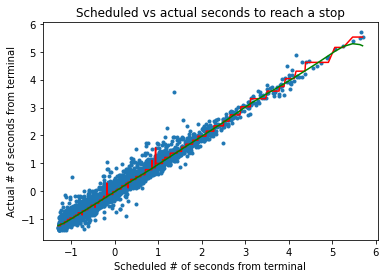

In [20]:
plt.scatter(X, Y, marker=".")
plt.plot(X, Y_pred_1, color='red', label = "decision tree")
plt.plot(X, Y_pred_2, color='green', label = "svr")

plt.title("Scheduled vs actual seconds to reach a stop")
plt.xlabel("Scheduled # of seconds from terminal")
plt.ylabel("Actual # of seconds from terminal")
#plt.xlim([-1, 1])
#plt.ylim([-1, 1])

<ipython-input-21-a587b6ee468e>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


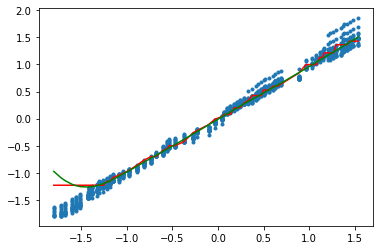

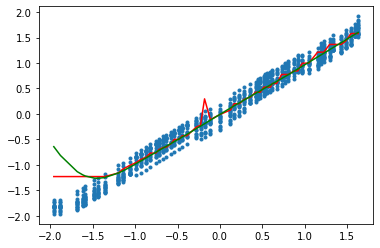

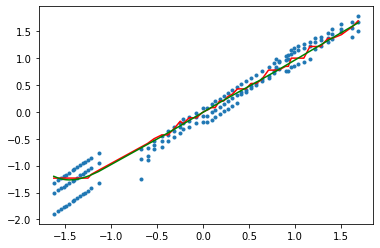

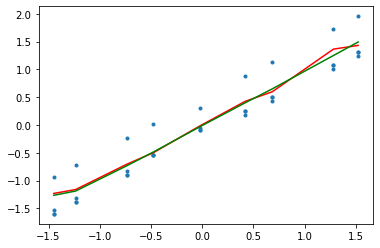

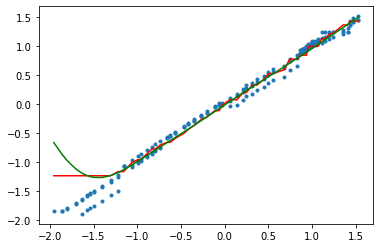

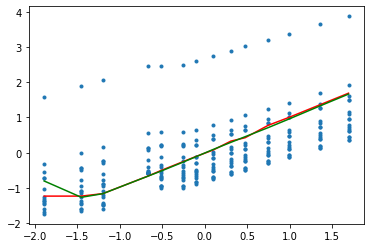

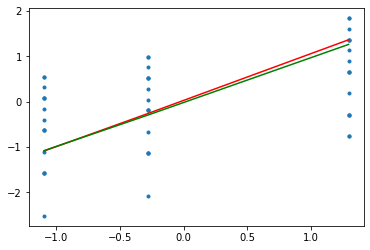

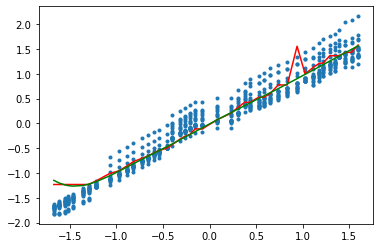

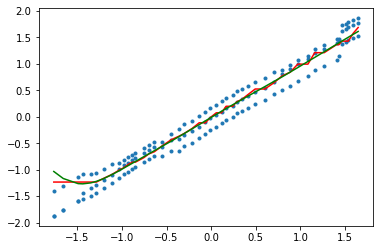

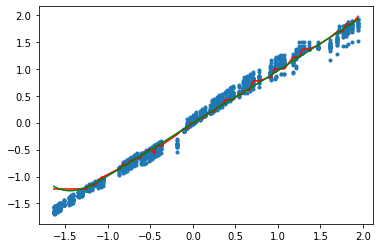

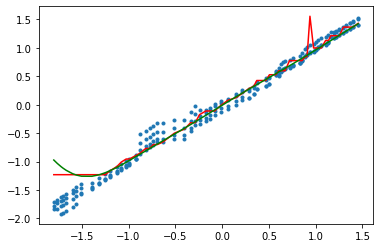

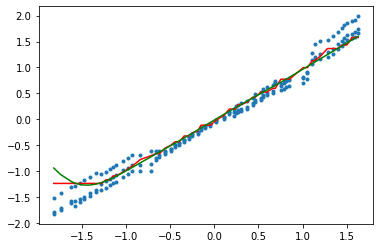

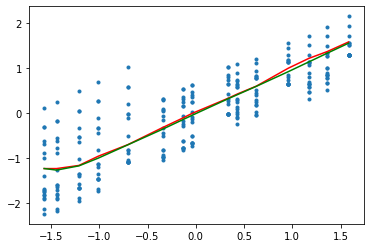

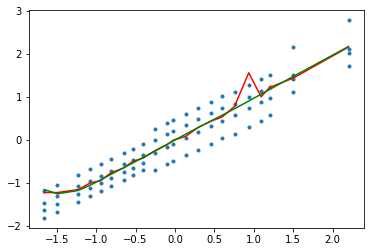

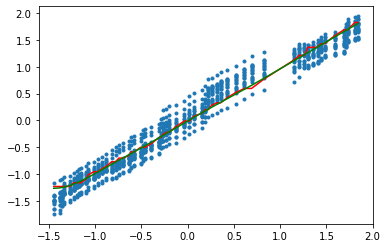

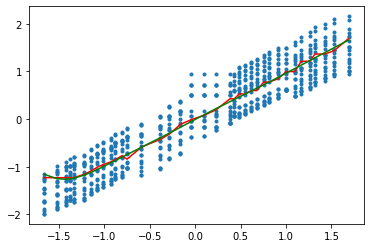

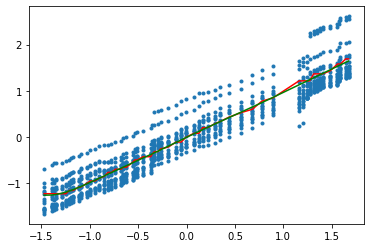

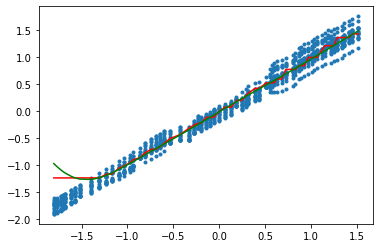

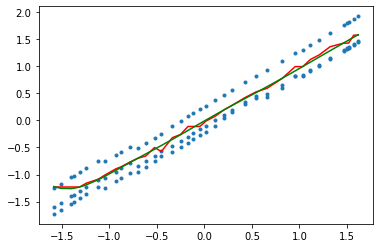

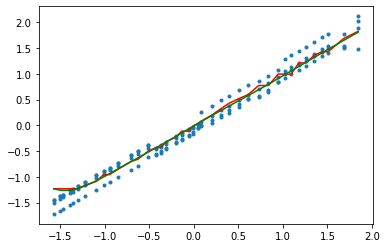

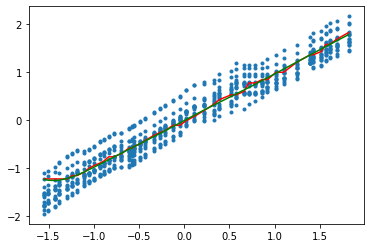

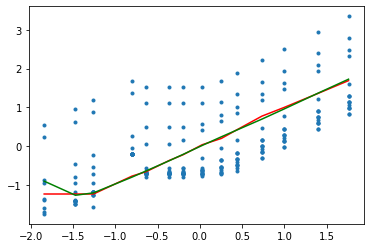

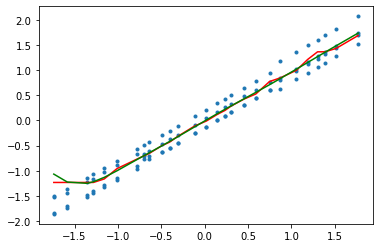

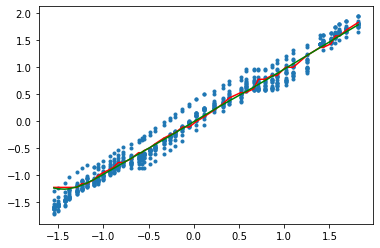

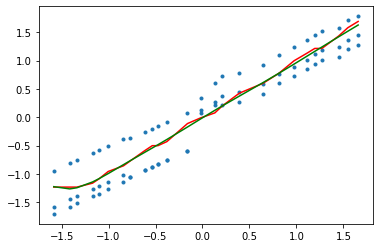

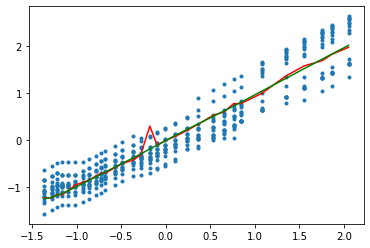

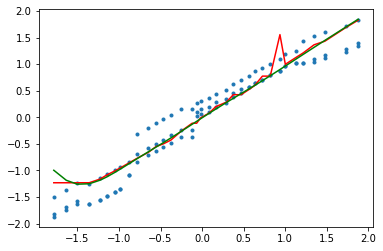

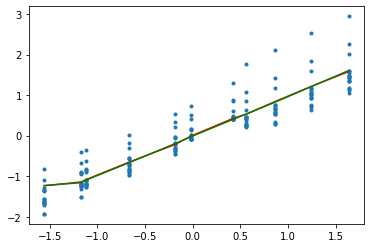

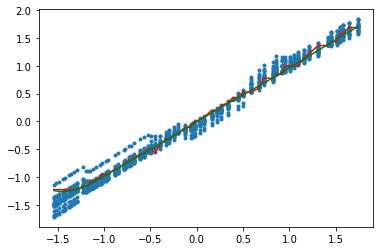

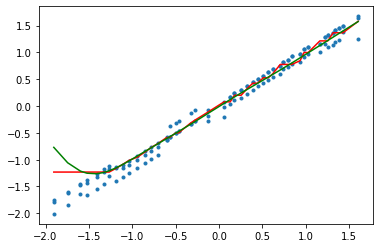

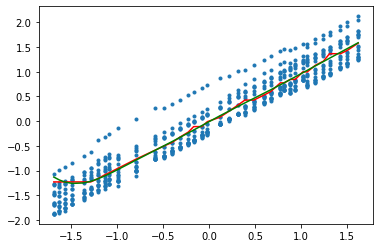

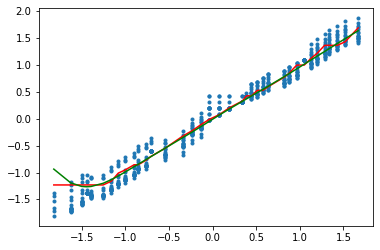

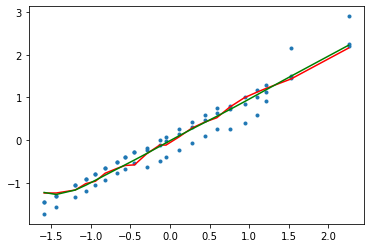

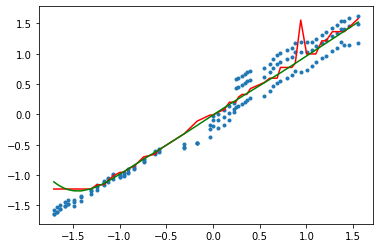

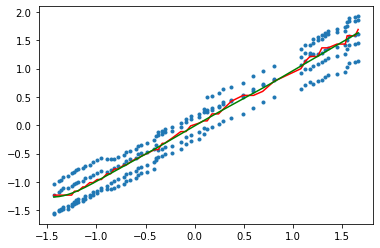

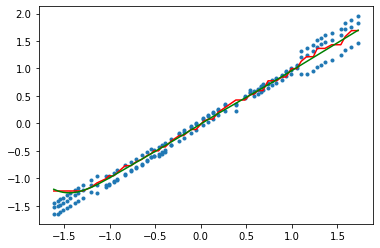

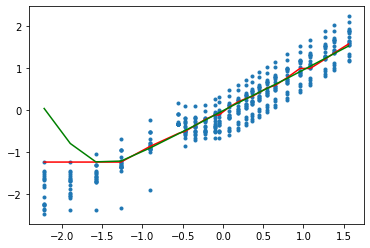

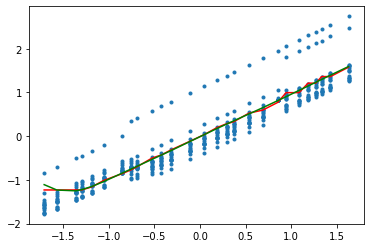

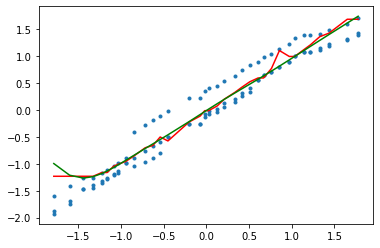

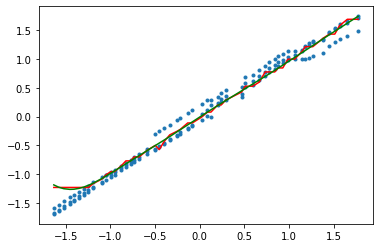

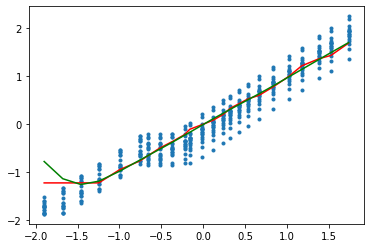

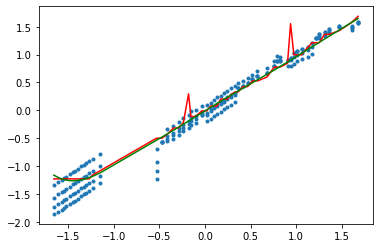

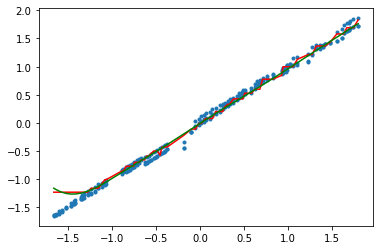

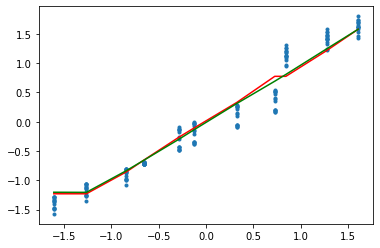

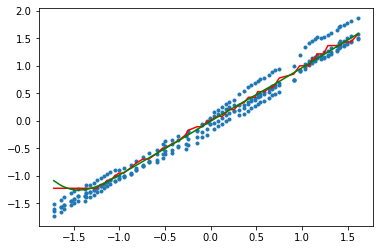

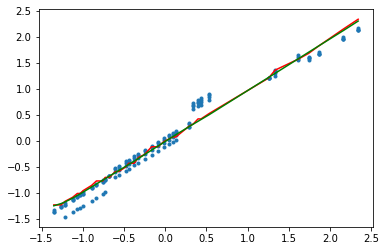

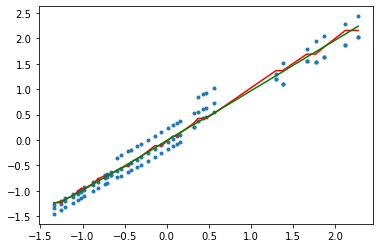

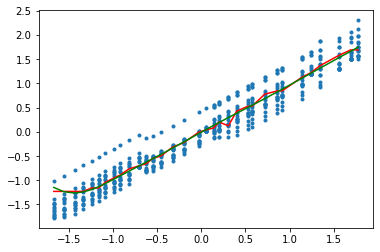

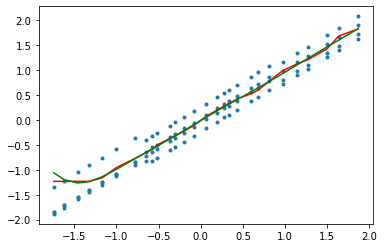

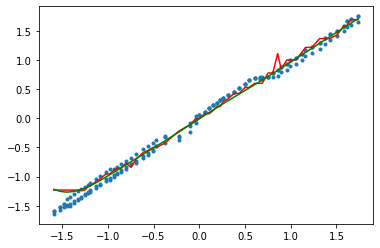

In [21]:
import random
trip_ids = df["trip_id"].unique()
for i in random.sample(range(len(trip_ids)), 50):
    cur_df = df.loc[(df['trip_id'] == trip_ids[i])].sort_values(["scheduled_departure_time", "real_departure_time"], ignore_index=True)
    
    X = cur_df["scheduled_departure_time"].values.reshape(-1, 1)
    Y = cur_df["real_departure_time"].values.reshape(-1, 1)
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    X = sc_X.fit_transform(X)
    Y = sc_y.fit_transform(Y)
    # We instead use the trained model based on the entire dataset
    # linear_regressor = LinearRegression()
    # linear_regressor.fit(X, Y)
    Y_pred_1 = regressor_1.predict(X)
    Y_pred_2 = regressor_2.predict(X)
    plt.figure(i)
    plt.scatter(X, Y, marker=".")
    plt.plot(X, Y_pred_1, color='red')
    plt.plot(X, Y_pred_2, color='green')